# Exercise sheet 3

In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

###### Reference: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
### Function Name: pearson_coefficient: 
##### Parameter: Data for correlation
   The Pearson correlation coefficient (PCC) is a measure of the linear correlation between two variables X and Y. PCC or 'r' has a value between +1 and −1

\begin{align}
r = \frac{\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {{\sum _{i=1}^{n}}(x_{i}-{\bar {x}})^2}\sqrt {{\sum _{i=1}^{n}}(y_{i}-{\bar {y}})^2}} \\
\end{align}

In [336]:
def pearson_coefficient(x,y):
    x = x - np.mean(x)
    y = y - np.mean(y)
    return (np.sum(x*y)/np.sqrt(np.sum(x*x)*np.sum(y*y)))
    

### Function Name: read_data
##### Parameter: Filename,column names
This function reads the data and returns the data with its headers

In [337]:
def read_data(filename,columns):
    if columns == None:
        data = pd.read_csv(filename, sep='\s+', delimiter = ";")
        return data
    data = pd.read_csv(filename, sep='\s+',header = None)
    data.columns = columns
    return data

### Function Name: check_na_null
##### Parameter: dataframe, column names

This function checks the presence of null or NA values within the dataset

In [338]:
def check_na_null(data,column_dummies):
    data.isnull().values.any()
    data.dropna(inplace = True)
    data = pd.get_dummies(data=data, columns=column_dummies)
    return data

In [339]:
def text_to_number(data,column):
    for i in column:
        Airdata[i] = pd.Categorical(Airdata[i])
        Airdata[i] = Airdata[i].cat.codes
    return data

###### Reference: http://mathworld.wolfram.com/FrobeniusNorm.html
### Function name: normalise_data
###### Parameters: data to be normalised

numpy.linalg.norm function returns the normalisation of a matrix. By default, it returns Forbenius Norm of a matrix

\begin{align}
{A}_{norm} = \sqrt{\sum_{i=1}^m\sum_{j=1}^n |A_{i,j}|^2} \\
\end{align}

In [340]:
def normalise_data(data):
    norm_data = data.copy()
    for columns in norm_data:
        norm_data[columns] = norm_data[columns]/np.linalg.norm(norm_data[columns])
    return norm_data

def denormalise_data(data,norm_data):
    denorm_data = data.copy()
    for columns in denorm_data:
        denorm_data[columns] = norm_data[columns]*np.linalg.norm(data[columns])
    return denorm_data

### Function Name: create_Test_Train_data
### Parameter: Data of input variables and target
This function splits the input variables and target data to Train and Test data with 80% and 20% of the data respectively

In [341]:
def create_Test_Train_data(X_data,Y_data):
    Y_train = Y_data[:math.ceil(0.8*len(Y_data))]
    Y_test = Y_data[math.ceil(0.8*len(Y_data)):]
    X_train = X_data[:math.ceil(0.8*len(X_data))]
    X_test = X_data[math.ceil(0.8*len(X_data)):]
    return Y_train,Y_test,X_train,X_test

### Root Mean Squared Error (RMSE):

\begin{align}
RMSE = \sqrt{\frac{\sum_{i=1}^n(y_{i} - \hat y_{i})^2}{n}} \\
\end{align}

In [342]:
def RMSE(y_data,y_pred):
    return np.sqrt(np.sum(pow((y_data - y_pred),2)))/len(y_pred)

In [343]:
def armijo_steplength(beta,X_train,Y_train,func_gradient,func_x):
    alpha = 1
    delta = 0.15
    sq_gradient = np.dot(func_gradient,func_gradient)
    for i in range (0,1000):
        alpha = alpha/2
        Y_prediction = linalg_prediction(beta-alpha*func_gradient,X_train)
        residual_alpha_grad = Y_prediction - Y_train
        func_alpha_grad =np.dot(residual_alpha_grad.T,residual_alpha_grad)
        
        if func_x - func_alpha_grad >  alpha*delta*sq_gradient:
            break
    return alpha

In [344]:
def bold_steplength(alpha,beta,X_train,Y_train,func_gradient,func_x):
    alphaplus = 1.9
    alphaminus = 0.9
    alpha = alpha * alphaplus
    sq_gradient = np.dot(func_gradient,func_gradient)
    for i in range (0,1000):
        alpha = alpha * alphaminus
        Y_prediction = linalg_prediction(beta-alpha*func_gradient,X_train)
        residual_alpha_grad = Y_prediction - Y_train
        func_alpha_grad =np.dot(residual_alpha_grad.T,residual_alpha_grad)
        
        if func_x - func_alpha_grad >  0:
            break
    return alpha

In [345]:
def linalg_prediction(beta,data):
    X = np.ones((data.shape[0],data.shape[1]+1))
    X[:,1:] = data
    return np.dot(beta,X.T)

     This function generates the model using linear regression with gradient descent with three different type
     of step lengths i.e., constant step length, Armijo step length and Bold Driver step length. The type of the step
     length to be used is given as a parameter to this function. The function predicts the price from the training
     data and also calculates the RMSE, difference between the functions for every iterations and appends the 
     same into respective lists for plotting of graphs. It also checks if the function is converged or not for every 
     iteration and updates the values of beta continuously until the maximum iteration is reached or the function
     is converged.  


In [346]:
def linalg_GD(alpha,beta,Y_train,Y_test,X_train,X_test,steplength_type):
    rmse_graph = []
    iteration_graph = []
    diff_graph  = []
    Y_prediction = linalg_prediction(beta,X_train)
    residual = Y_prediction - Y_train
    func_x = np.dot(residual.T,residual)
    rmse = RMSE(Y_test,linalg_prediction(beta,X_test))
    rmse_graph.append(rmse)
    iteration_graph.append(0)
    diff_graph.append(func_x)
    
    X = np.ones((X_train.shape[0],X_train.shape[1]+1))
    X[:,1:] = X_train
    iterations = 1000
    for i in range (1,iterations):
        func_gradient = 2 * np.dot(X.T,residual)
        if steplength_type == "Armijo":
            alpha = armijo_steplength(beta,X_train,Y_train,
                                      func_gradient,func_x)
        if steplength_type == "Bold":
            alpha = bold_steplength(alpha,beta,X_train,Y_train,
                                    func_gradient,func_x)
        beta = beta - (alpha * func_gradient)
        Y_prediction = np.dot(beta,X.T)
        residual = Y_prediction - Y_train
        func_x_1 = np.dot(residual.T,residual)
        
        if math.isnan(abs(func_x_1 - func_x)):
            break
        
        y_pred_test = linalg_prediction(beta,X_test)
        rmse = RMSE(Y_test,y_pred_test)
        rmse_graph.append(rmse)
        iteration_graph.append(i)
        diff_graph.append(abs(func_x_1 - func_x))
        
        if abs(func_x_1 - func_x) < 1.1e-25:
            print("Function converged in "+ str(i) +" iterations")
            return beta,rmse_graph,iteration_graph,diff_graph,y_pred_test
        func_x = func_x_1
    return beta,rmse_graph,iteration_graph,diff_graph,y_pred_test

#  Gradient descent for Airline Price

In [347]:
filename = "airq402.dat.txt"
columns = ['City1','City2','Avg_Fare1','Distance','Avg_Psngr/week','Ld_Airline','Mrkt_Share1','Avg_Fare2','Low_Prc_Air','Mrkt_Share2','Price']
Airdata = read_data(filename,columns)
Airdata.head()

,City1,City2,Avg_Fare1,Distance,Avg_Psngr/week,Ld_Airline,Mrkt_Share1,Avg_Fare2,Low_Prc_Air,Mrkt_Share2,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [348]:
text_columns = ['City1', 'City2','Ld_Airline','Low_Prc_Air']
Airdata_dummies = check_na_null(Airdata,text_columns)
Airdata_dummies.head()

,Avg_Fare1,Distance,Avg_Psngr/week,Mrkt_Share1,Avg_Fare2,Mrkt_Share2,Price,City1_ABQ,City1_ACY,City1_ALB,...,Low_Prc_Air_G4,Low_Prc_Air_HP,Low_Prc_Air_NK,Low_Prc_Air_NW,Low_Prc_Air_SY,Low_Prc_Air_TZ,Low_Prc_Air_UA,Low_Prc_Air_US,Low_Prc_Air_WN,Low_Prc_Air_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [349]:
Airdata = text_to_number(Airdata,text_columns)
Airdata.head()

,City1,City2,Avg_Fare1,Distance,Avg_Psngr/week,Ld_Airline,Mrkt_Share1,Avg_Fare2,Low_Prc_Air,Mrkt_Share2,Price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


To begin with the problem, first we’ve to find the correlation between the input variables and the price
     for better prediction of the target value. For this, we can use pearson co-efficient which gives the correlation
     between two variables.


In [350]:
Airdat_correlation = []
for column in Airdata:
    if column != "Price":
        Airdat_correlation.append(str(round(pearson_coefficient(np.array(Airdata[column]),np.array(Airdata["Price"])),4)))

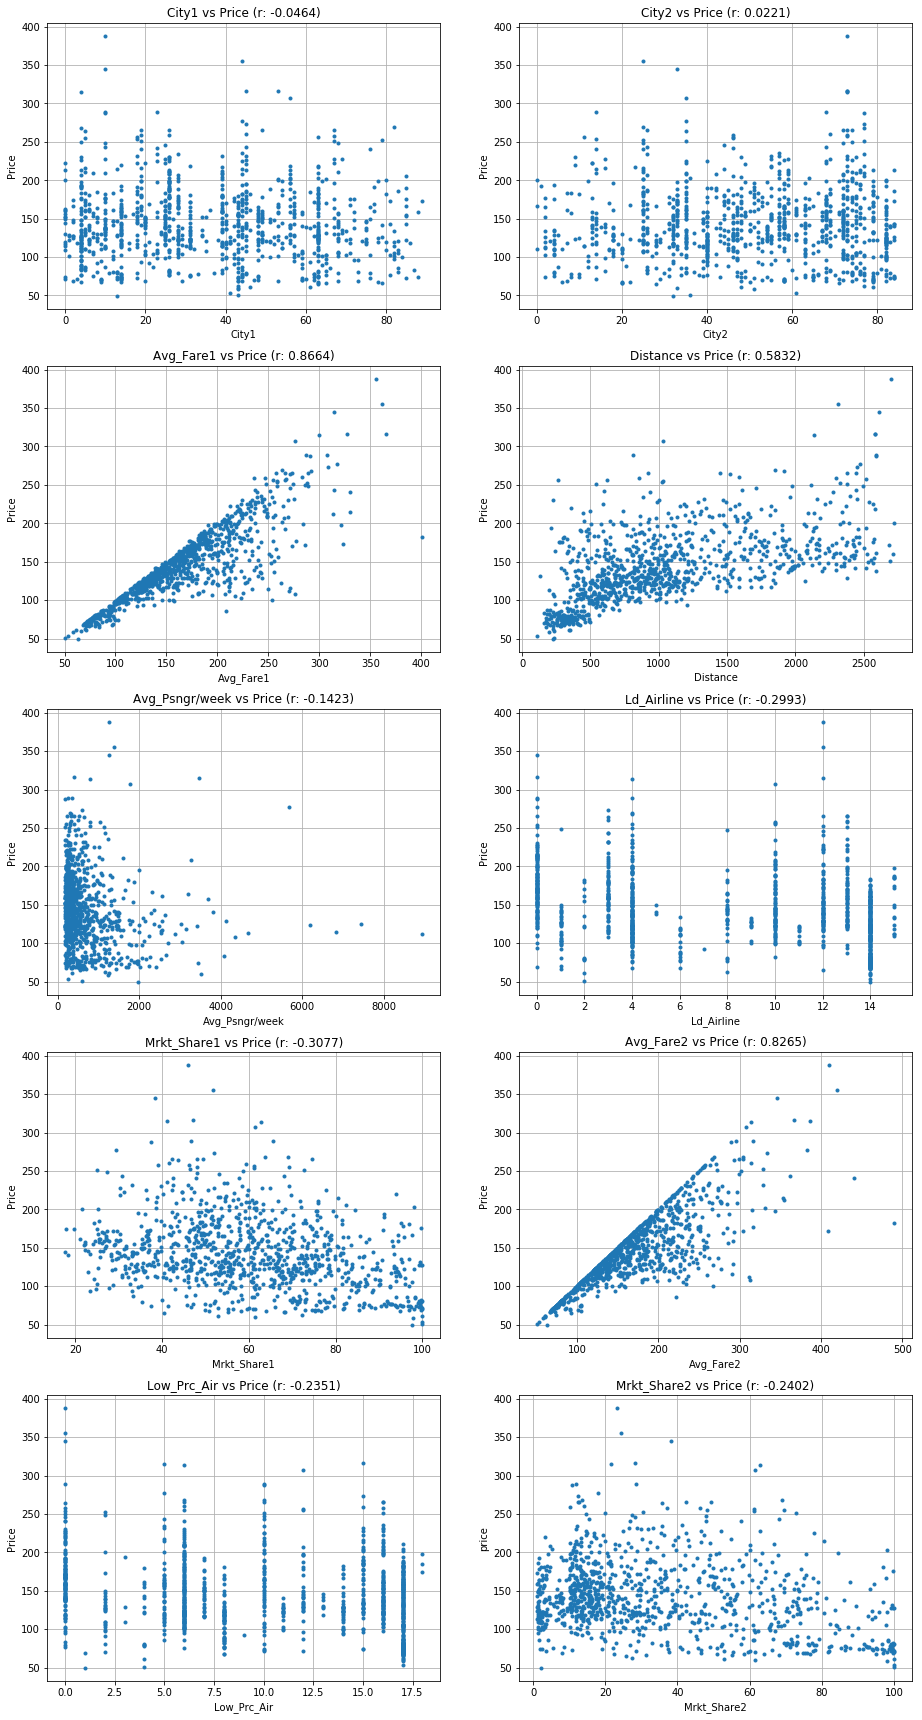

In [351]:
i=0
plt.close()
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10))  = plt.subplots(5,2,sharey='none')
figure.set_size_inches(15.5, 30.5)

ax1.plot(Airdata.City1, Airdata.Price, ".")
ax1.grid()
ax1.set_title("City1 vs Price (r: "+Airdat_correlation[0]+")")
ax1.set_xlabel("City1")
ax1.set_ylabel("Price")

ax2.plot(Airdata.City2, Airdata.Price, ".")
ax2.grid()
ax2.set_title("City2 vs Price (r: "+Airdat_correlation[1]+")")
ax2.set_xlabel("City2")
ax2.set_ylabel("Price")

ax3.plot(Airdata.Avg_Fare1, Airdata.Price, ".")
ax3.grid()
ax3.set_title("Avg_Fare1 vs Price (r: "+Airdat_correlation[2]+")")
ax3.set_xlabel("Avg_Fare1")
ax3.set_ylabel("Price")

ax4.plot(Airdata.Distance, Airdata.Price, ".")
ax4.grid()
ax4.set_title("Distance vs Price (r: "+Airdat_correlation[3]+")")
ax4.set_xlabel("Distance")
ax4.set_ylabel("Price")

ax5.plot(Airdata["Avg_Psngr/week"], Airdata.Price, ".")
ax5.grid()
ax5.set_title("Avg_Psngr/week vs Price (r: "+Airdat_correlation[4]+")")
ax5.set_xlabel("Avg_Psngr/week")
ax5.set_ylabel("Price")

ax6.plot(Airdata.Ld_Airline, Airdata.Price, ".")
ax6.grid()
ax6.set_title("Ld_Airline vs Price (r: "+Airdat_correlation[5]+")")
ax6.set_xlabel("Ld_Airline")
ax6.set_ylabel("Price")

ax7.plot(Airdata.Mrkt_Share1, Airdata.Price, ".")
ax7.grid()
ax7.set_title("Mrkt_Share1 vs Price (r: "+Airdat_correlation[6]+")")
ax7.set_xlabel("Mrkt_Share1")
ax7.set_ylabel("Price")

ax8.plot(Airdata.Avg_Fare2, Airdata.Price, ".")
ax8.grid()
ax8.set_title("Avg_Fare2 vs Price (r: "+Airdat_correlation[7]+")")
ax8.set_xlabel("Avg_Fare2")
ax8.set_ylabel("Price")

ax9.plot(Airdata.Low_Prc_Air, Airdata.Price, ".")
ax9.grid()
ax9.set_title("Low_Prc_Air vs Price (r: "+Airdat_correlation[8]+")")
ax9.set_xlabel("Low_Prc_Air")
ax9.set_ylabel("Price")

ax10.plot(Airdata.Mrkt_Share2, Airdata.Price, ".")
ax10.grid()
ax10.set_title("Mrkt_Share2 vs Price (r: "+Airdat_correlation[9]+")")
ax10.set_xlabel("Mrkt_Share2")
ax10.set_ylabel("price")

plt.show()

From the plots between the parameters and price, we can conclude that there is no relation between City1, City2, Market Leading Airline and Low Price Airline. Hence, I am dropping out these columns from the dataset to be used for creating the model

In [352]:
Required_airdata = Airdata.drop(columns = ['City1','City2','Ld_Airline','Low_Prc_Air'])

In [353]:
Shuffle_data = Required_airdata.sample(frac = 1)
Y_data = Shuffle_data["Price"]
X_data = Shuffle_data.drop(columns = ['Price'])
X_data = X_data.values
Y_train,Y_test,X_train,X_test = create_Test_Train_data(X_data,Y_data)



In [354]:
initialbeta = np.random.random_sample(X_data.shape[1]+1)

#### To perform GD with constant step length

RMSE (α=0.1)  =  inf
RMSE (α=1.4e-10)  =  1.8487716283625588
RMSE (α=1.54e-11) =  2.7191214535734733


Best Model: 
α = 1.4e-10
β =  [ 0.88598036  0.09632476  0.01629117 -0.00361771  0.52913636  0.47401165
  0.06170627]
RMSE 1.8487716283625588


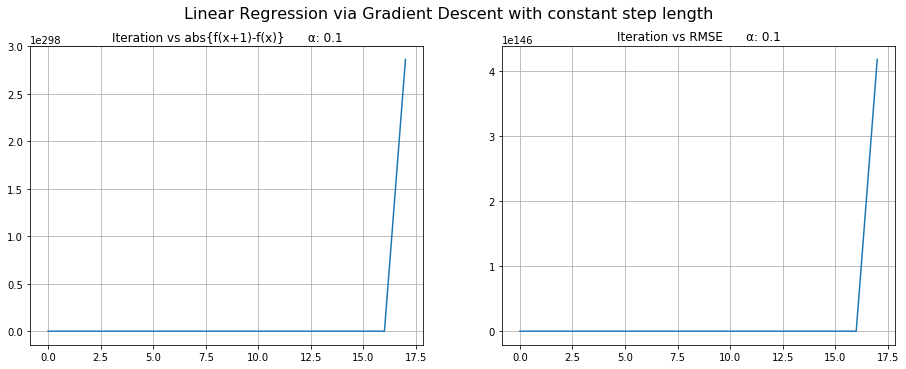

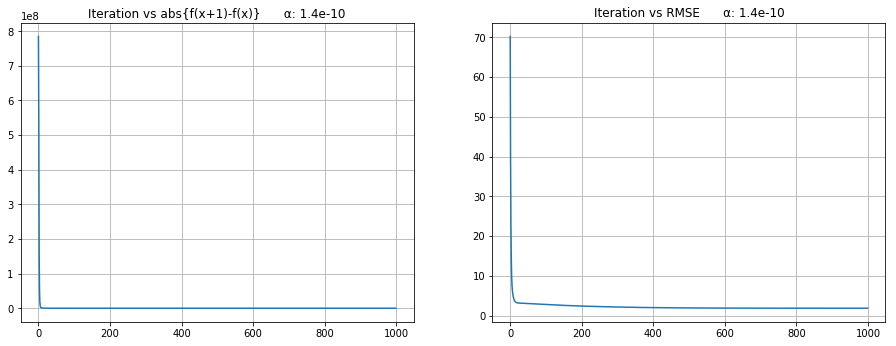

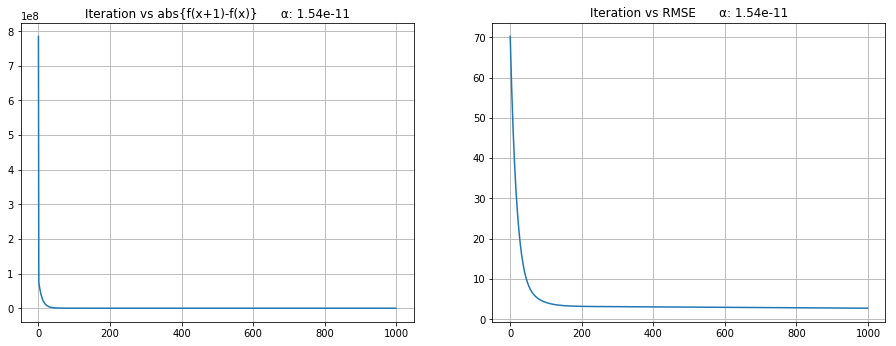

In [355]:
alpha = [0.1,1.4e-10,1.54e-11]
steplength_type = None
plot_rmse = []
plot_iter = []
plot_diff = []
beta1,rmse_graph,iteration_graph,diff_graph,y_pred_constant = linalg_GD(alpha[0],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
figure.set_size_inches(15.5, 5.5)
rmse1 = rmse_graph
plt.suptitle("Linear Regression via Gradient Descent with constant step length\n\n",fontsize = "16")
ax1.plot(iteration_graph,diff_graph)
ax1.grid()
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}      α: "+str(alpha[0]))
ax2.plot(iteration_graph,rmse_graph)
ax2.set_title("Iteration vs RMSE      α: "+str(alpha[0]))
ax2.grid()
plt.show
beta2,rmse_graph,iteration_graph,diff_graph,y_pred_constant1 = linalg_GD(alpha[1],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure1, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
figure1.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph,diff_graph)
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}      α: "+str(alpha[1]))
ax1.grid()
ax2.plot(iteration_graph,rmse_graph)
ax2.set_title("Iteration vs RMSE      α: "+str(alpha[1]))
ax2.grid()
plt.show
rmse2 = rmse_graph
beta3,rmse_graph,iteration_graph,diff_graph,y_pred_constant2 = linalg_GD(alpha[2],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure1, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
figure1.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph,diff_graph)
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}      α: "+str(alpha[2]))
ax1.grid()
ax2.plot(iteration_graph,rmse_graph)
ax2.set_title("Iteration vs RMSE      α: "+str(alpha[2]))
ax2.grid()
plt.show
rmse3 = rmse_graph

print("RMSE (α=0.1)  = ",rmse1[-1])
print("RMSE (α=1.4e-10)  = ",rmse2[-1])
print("RMSE (α=1.54e-11) = ",rmse3[-1])


print("\n\nBest Model: \nα = 1.4e-10\nβ = ",beta2)
print("RMSE",rmse2[-1])

#### GD with Armijo step length

<function matplotlib.pyplot.show(*args, **kw)>

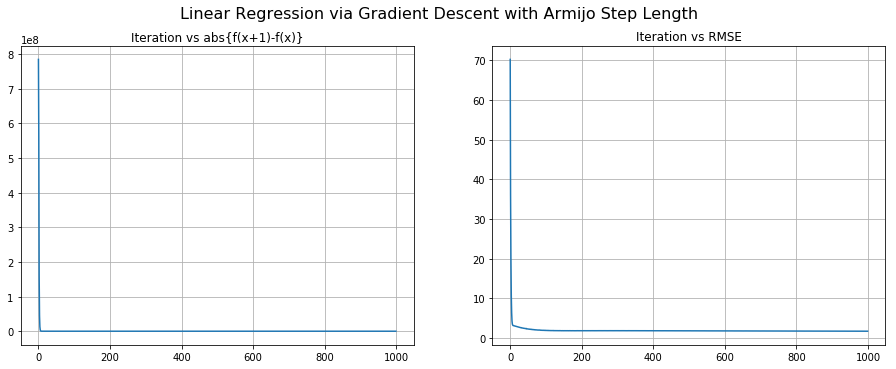

In [357]:
alpha = [1]
steplength_type = "Armijo"
plot_rmse_armijo = []
plot_iter_armijo = []
plot_diff_armijo = []
beta,rmse_graph_armijo,iteration_graph_armijo,diff_graph_armijo,Y_prediction = linalg_GD(alpha[0],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
figure.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph_armijo,diff_graph_armijo)
ax1.grid()
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}")
ax2.plot(iteration_graph_armijo,rmse_graph_armijo)
ax2.set_title("Iteration vs RMSE")
ax2.grid()
plt.suptitle("Linear Regression via Gradient Descent with Armijo Step Length\n",fontsize = "16")
plt.show

#### GD with Bold driven step length

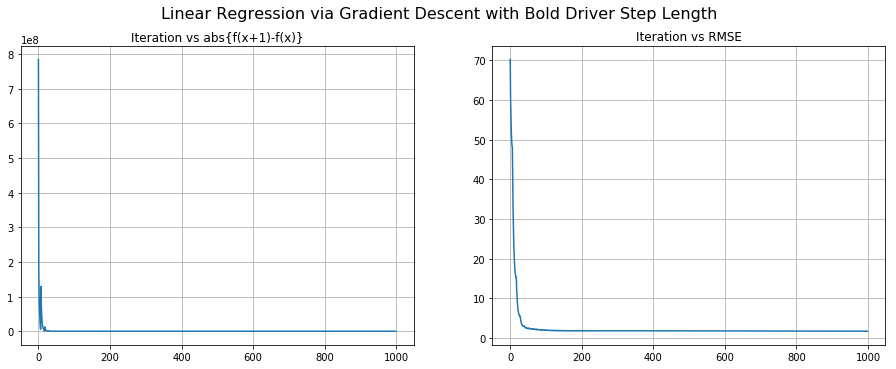

In [358]:
alpha = [1]
steplength_type = "Bold"
plot_rmse_bold = []
plot_iter_bold = []
plot_diff_bold = []
beta,rmse_graph_bold,iteration_graph_bold,diff_graph_bold,Y_prediction_bold = linalg_GD(alpha[0],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
plt.suptitle("Linear Regression via Gradient Descent with Bold Driver Step Length",fontsize = "16")
figure.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph_bold,diff_graph_bold)
ax1.grid()
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}")
ax2.plot(iteration_graph_bold,rmse_graph_bold)
ax2.set_title("Iteration vs RMSE")
ax2.grid()

In [359]:
combined = pd.DataFrame({"Actual Price":Y_test,"Constant steplength":y_pred_constant1,"Armijo steplength":Y_prediction,"Bold steplength":Y_prediction_bold})

print("RMSE with Armijo step length: ",rmse_graph_armijo[-1])
print("RMSE with Bold driver step length: ",rmse_graph_bold[-1])
print("RMSE with constant step length: ",rmse2[-1],"\n\n\n")
combined.head(15)

RMSE with Armijo step length:  1.7291607050190652
RMSE with Bold driver step length:  1.7556533146175883
RMSE with constant step length:  1.8487716283625588 





,Actual Price,Armijo steplength,Bold steplength,Constant steplength
774,307.33,221.206667,219.464740,219.804556
637,156.99,140.801888,140.872600,143.464367
697,69.78,76.795247,76.740244,80.036839
990,100.08,139.318442,140.056938,148.206600
837,315.61,283.273032,280.810914,272.158451
330,225.45,179.489685,178.297110,181.590500
615,116.74,123.521168,123.747622,124.131209
120,86.65,93.953795,93.563022,95.583202
302,166.93,163.863810,163.214541,161.750853
182,123.78,183.935686,183.987194,193.938605


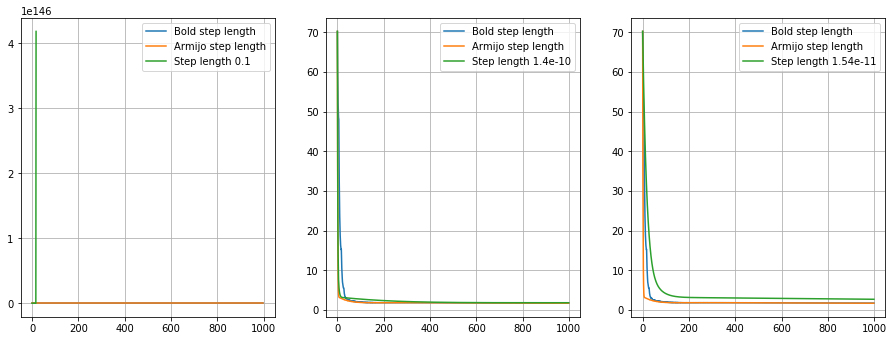

In [360]:
figure, ((ax1, ax2, ax3))  = plt.subplots(1,3,sharey='none')
figure.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph_bold,rmse_graph_bold,iteration_graph_armijo,rmse_graph_armijo,iteration_graph[:19],rmse1)
ax1.legend(['Bold step length','Armijo step length','Step length 0.1'])
ax1.grid()
ax2.plot(iteration_graph_bold,rmse_graph_bold,iteration_graph_armijo,rmse_graph_armijo,iteration_graph,rmse2)
ax2.legend(['Bold step length','Armijo step length','Step length 1.4e-10'])
ax2.grid()
ax3.plot(iteration_graph_bold,rmse_graph_bold,iteration_graph_armijo,rmse_graph_armijo,iteration_graph,rmse3)
ax3.legend(['Bold step length','Armijo step length','Step length 1.54e-11'])
ax3.grid()

# Gradient descent for Red wine quality

In [361]:
filename = "winequality-red.csv"
columns = None
redwinedata = read_data(filename,columns)
redwinedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [362]:
redwinedata_correlation = []
for column in redwinedata:
    if column != "quality":
        redwinedata_correlation.append(str(round(pearson_coefficient
                                                 (np.array(redwinedata[column]),np.array(redwinedata["quality"])),4)))

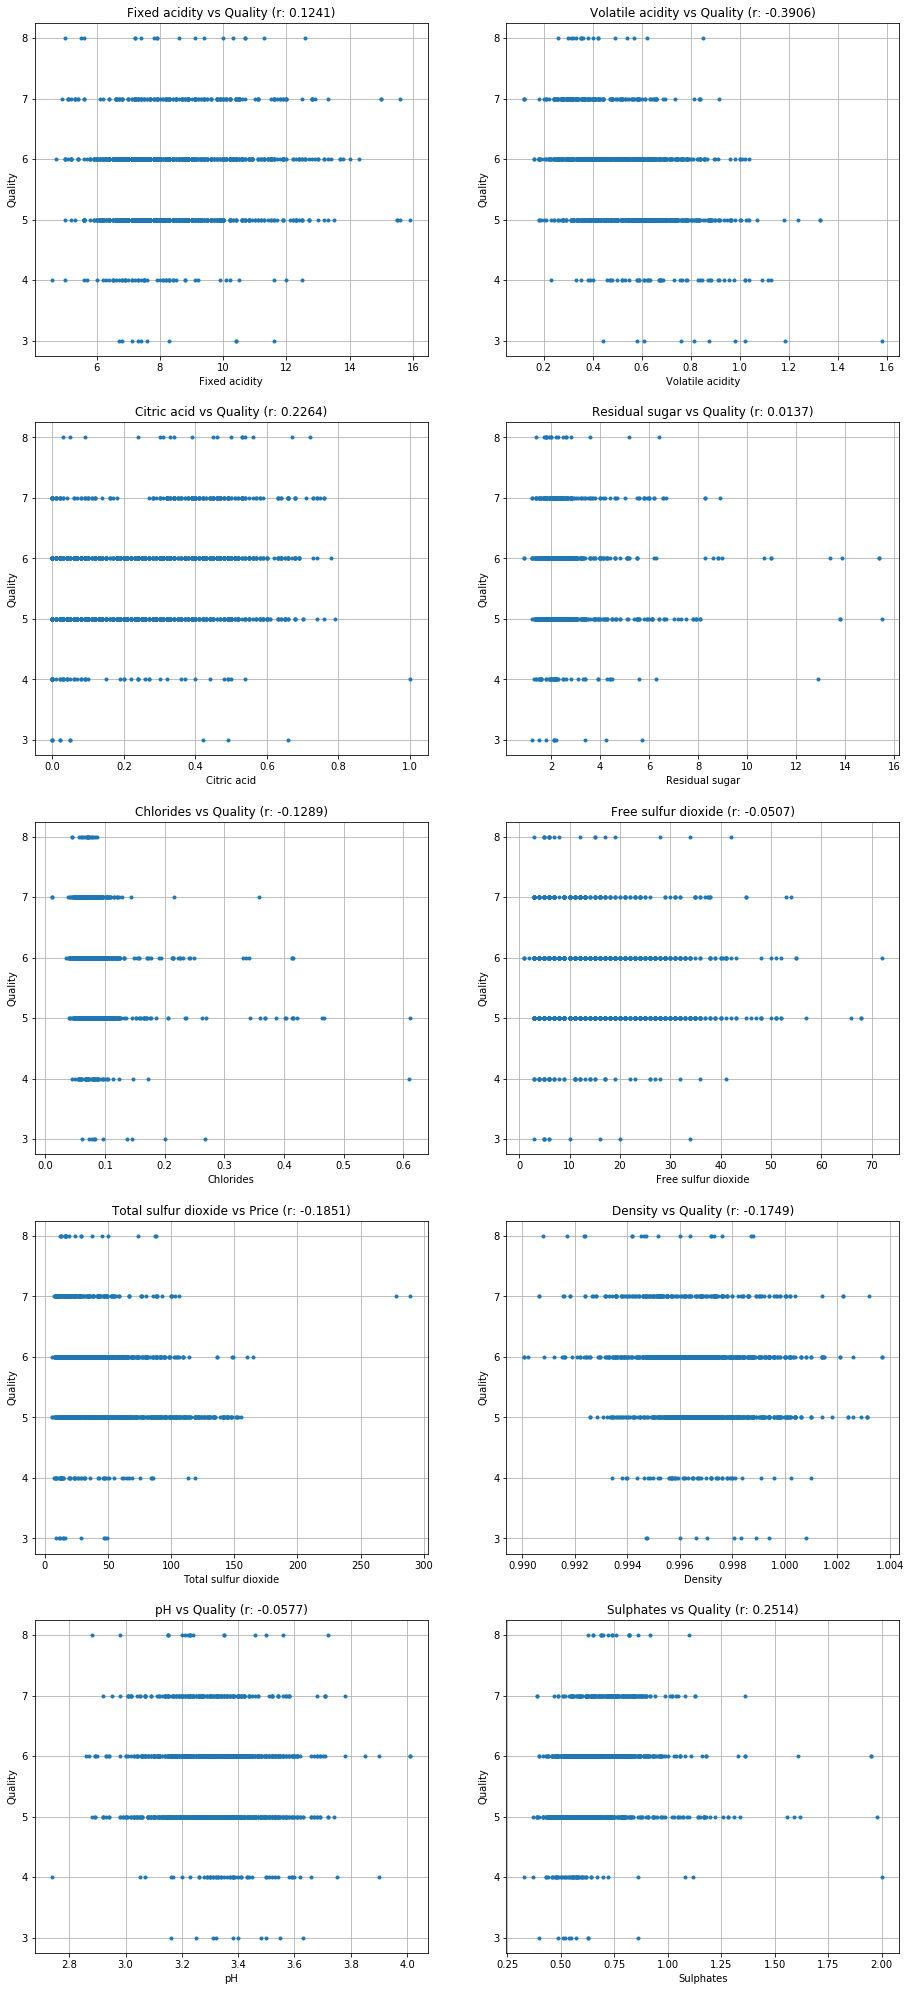

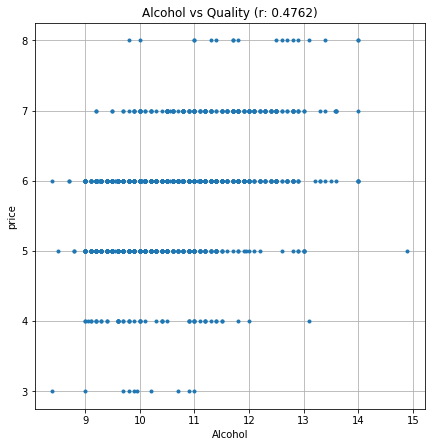

In [363]:
plt.close()
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10))  = plt.subplots(5,2,sharey='none')
figure.set_size_inches(15.5, 35.5)

ax1.plot(redwinedata['fixed acidity'], redwinedata.quality, ".")
ax1.grid()
ax1.set_title("Fixed acidity vs Quality (r: "+redwinedata_correlation[0]+")")
ax1.set_xlabel("Fixed acidity")
ax1.set_ylabel("Quality")

ax2.plot(redwinedata['volatile acidity'], redwinedata.quality, ".")
ax2.grid()
ax2.set_title("Volatile acidity vs Quality (r: "+redwinedata_correlation[1]+")")
ax2.set_xlabel("Volatile acidity")
ax2.set_ylabel("Quality")

ax3.plot(redwinedata['citric acid'], redwinedata.quality, ".")
ax3.grid()
ax3.set_title("Citric acid vs Quality (r: "+redwinedata_correlation[2]+")")
ax3.set_xlabel("Citric acid")
ax3.set_ylabel("Quality")

ax4.plot(redwinedata['residual sugar'], redwinedata.quality, ".")
ax4.grid()
ax4.set_title("Residual sugar vs Quality (r: "+redwinedata_correlation[3]+")")
ax4.set_xlabel("Residual sugar")
ax4.set_ylabel("Quality")

ax5.plot(redwinedata['chlorides'], redwinedata.quality, ".")
ax5.grid()
ax5.set_title("Chlorides vs Quality (r: "+redwinedata_correlation[4]+")")
ax5.set_xlabel("Chlorides")
ax5.set_ylabel("Quality")

ax6.plot(redwinedata['free sulfur dioxide'], redwinedata.quality, ".")
ax6.grid()
ax6.set_title("Free sulfur dioxide (r: "+redwinedata_correlation[5]+")")
ax6.set_xlabel("Free sulfur dioxide")
ax6.set_ylabel("Quality")

ax7.plot(redwinedata['total sulfur dioxide'], redwinedata.quality, ".")
ax7.grid()
ax7.set_title("Total sulfur dioxide vs Price (r: "+redwinedata_correlation[6]+")")
ax7.set_xlabel("Total sulfur dioxide")
ax7.set_ylabel("Quality")

ax8.plot(redwinedata['density'], redwinedata.quality, ".")
ax8.grid()
ax8.set_title("Density vs Quality (r: "+redwinedata_correlation[7]+")")
ax8.set_xlabel("Density")
ax8.set_ylabel("Quality")

ax9.plot(redwinedata['pH'], redwinedata.quality, ".")
ax9.grid()
ax9.set_title("pH vs Quality (r: "+redwinedata_correlation[8]+")")
ax9.set_xlabel("pH")
ax9.set_ylabel("Quality")

ax10.plot(redwinedata['sulphates'], redwinedata.quality, ".")
ax10.grid()
ax10.set_title("Sulphates vs Quality (r: "+redwinedata_correlation[9]+")")
ax10.set_xlabel("Sulphates")
ax10.set_ylabel("Quality")

plt.show()

plt.figure(figsize = (7,7.1))
plt.plot(redwinedata['alcohol'], redwinedata.quality, ".")
plt.grid()
plt.title("Alcohol vs Quality (r: "+redwinedata_correlation[10]+")")
plt.xlabel("Alcohol")
plt.ylabel("price")

plt.show()

From the plots between the parameters and price, we can conclude that there is no relation between City1, City2, Market Leading Airline and Low Price Airline. Hence, I am dropping out these columns from the dataset to be used for creating the model

In [364]:
Required_redwinedata = redwinedata.drop(columns = ['residual sugar','free sulfur dioxide','pH','fixed acidity','chlorides','total sulfur dioxide'])
                                #,'Avg_Fare1','Avg_Fare2','Mrkt_Share1','Mrkt_Share2'])
Required_redwinedata.head()

,volatile acidity,citric acid,density,sulphates,alcohol,quality
0,0.70,0.00,0.9978,0.56,9.4,5
1,0.88,0.00,0.9968,0.68,9.8,5
2,0.76,0.04,0.9970,0.65,9.8,5
3,0.28,0.56,0.9980,0.58,9.8,6
4,0.70,0.00,0.9978,0.56,9.4,5


In [365]:
Shuffle_data = Required_redwinedata.sample(frac = 1)
Y_data = Shuffle_data["quality"]
X_data = Shuffle_data.drop(columns = ['quality'])
X_data = X_data.values
Y_train,Y_test,X_train,X_test = create_Test_Train_data(X_data,Y_data)


In [366]:
initialbeta = np.random.random_sample(X_data.shape[1]+1)

RMSE (α=1.4e-07)  =  0.04264527856951254
RMSE (α=1.4e-08)  =  0.0427488087351867
RMSE (α=1.54e-09) =  0.0453164309622591


Best Model: 
α = 1.4e-07
β =  [0.67145387 0.71156757 0.18586317 0.06332776 0.29451858 0.40999157]
RMSE 0.04264527856951254 





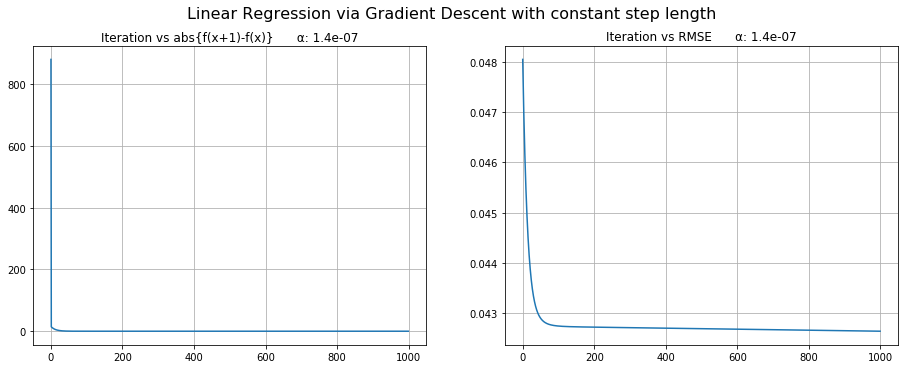

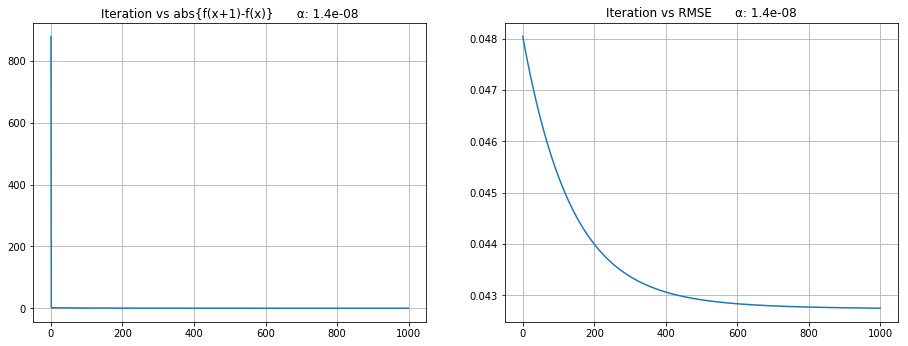

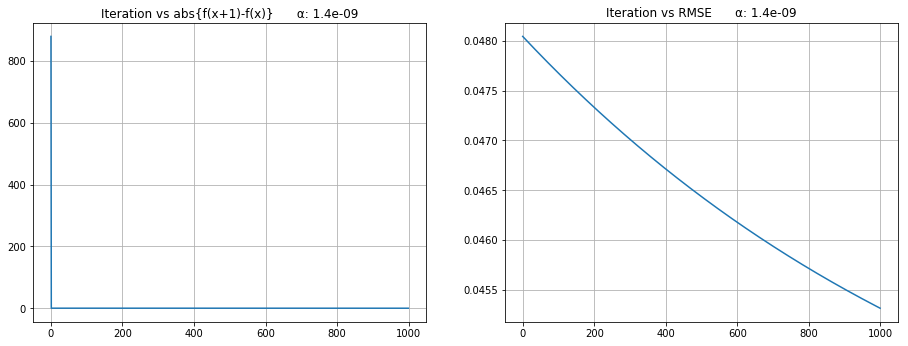

In [367]:
alpha = [1.4e-7,1.4e-8,1.4e-9]
steplength_type = None
plot_rmse = []
plot_iter = []
plot_diff = []
beta1,rmse_graph,iteration_graph,diff_graph,y_pred_constant = linalg_GD(alpha[0],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
figure.set_size_inches(15.5, 5.5)
rmse1 = rmse_graph
plt.suptitle("Linear Regression via Gradient Descent with constant step length\n\n",fontsize = "16")
ax1.plot(iteration_graph,diff_graph)
ax1.grid()
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}      α: "+str(alpha[0]))
ax2.plot(iteration_graph,rmse_graph)
ax2.set_title("Iteration vs RMSE      α: "+str(alpha[0]))
ax2.grid()
plt.show
beta2,rmse_graph,iteration_graph,diff_graph,y_pred_constant1 = linalg_GD(alpha[1],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure1, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
figure1.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph,diff_graph)
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}      α: "+str(alpha[1]))
ax1.grid()
ax2.plot(iteration_graph,rmse_graph)
ax2.set_title("Iteration vs RMSE      α: "+str(alpha[1]))
ax2.grid()
plt.show
rmse2 = rmse_graph
beta3,rmse_graph,iteration_graph,diff_graph,y_pred_constant2 = linalg_GD(alpha[2],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure1, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
figure1.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph,diff_graph)
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}      α: "+str(alpha[2]))
ax1.grid()
ax2.plot(iteration_graph,rmse_graph)
ax2.set_title("Iteration vs RMSE      α: "+str(alpha[2]))
ax2.grid()
plt.show
rmse3 = rmse_graph

print("RMSE (α=1.4e-07)  = ",rmse1[-1])
print("RMSE (α=1.4e-08)  = ",rmse2[-1])
print("RMSE (α=1.54e-09) = ",rmse3[-1])


print("\n\nBest Model: \nα = 1.4e-07\nβ = ",beta1,)
print("RMSE",rmse1[-1],"\n\n\n")

In [368]:
combined = pd.DataFrame({"Actual Price":Y_test,"Prediction (α=1.54e-09)":y_pred_constant2,"Prediction (α=1.4e-07)":y_pred_constant,"Prediction (α=1.4e-08)":y_pred_constant1})
combined.head(15)

,Actual Price,Prediction (α=1.4e-07),Prediction (α=1.4e-08),Prediction (α=1.54e-09)
72,5,5.302695,5.301894,5.082811
165,5,5.349558,5.343392,5.123488
1443,5,6.125450,6.121972,5.853373
142,6,6.948734,6.939449,6.618613
1057,5,4.978768,4.971973,4.761416
565,5,6.094537,6.087488,5.824946
1360,5,5.810294,5.804461,5.553452
1202,8,6.105939,6.095486,5.825966
1400,5,5.473675,5.472557,5.244429
1572,5,5.330131,5.327914,5.108588


<function matplotlib.pyplot.show(*args, **kw)>

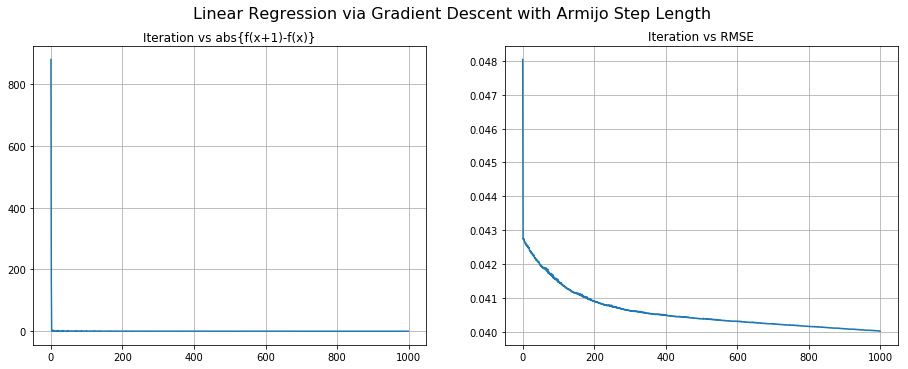

In [369]:
alpha = [1]
steplength_type = "Armijo"
plot_rmse_armijo = []
plot_iter_armijo = []
plot_diff_armijo = []
beta,rmse_graph_armijo,iteration_graph_armijo,diff_graph_armijo,Y_prediction = linalg_GD(alpha[0],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
figure.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph_armijo,diff_graph_armijo)
ax1.grid()
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}")
ax2.plot(iteration_graph_armijo,rmse_graph_armijo)
ax2.set_title("Iteration vs RMSE")
ax2.grid()
plt.suptitle("Linear Regression via Gradient Descent with Armijo Step Length\n",fontsize = "16")
plt.show

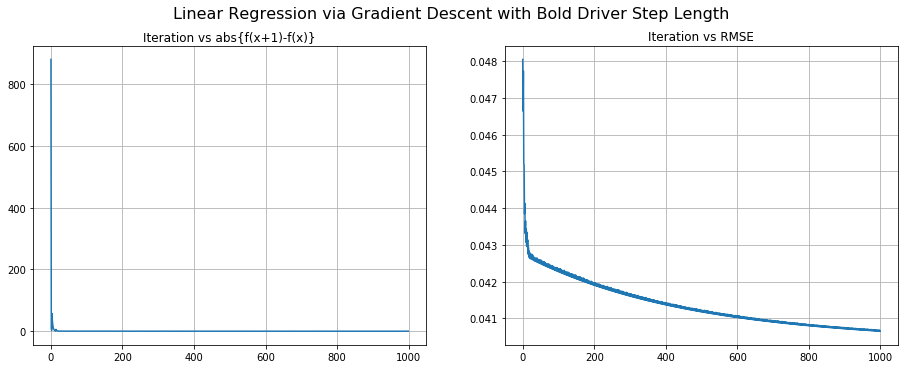

In [370]:
alpha = [1]
steplength_type = "Bold"
plot_rmse_bold = []
plot_iter_bold = []
plot_diff_bold = []
beta,rmse_graph_bold,iteration_graph_bold,diff_graph_bold,Y_prediction_bold = linalg_GD(alpha[0],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
plt.suptitle("Linear Regression via Gradient Descent with Bold Driver Step Length",fontsize = "16")
figure.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph_bold,diff_graph_bold)
ax1.grid()
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}")
ax2.plot(iteration_graph_bold,rmse_graph_bold)
ax2.set_title("Iteration vs RMSE")
ax2.grid()

In [371]:
combined = pd.DataFrame({"Actual Price":Y_test,"Constant steplength":y_pred_constant1,"Armijo steplength":Y_prediction,"Bold steplength":Y_prediction_bold})

print("RMSE with Armijo step length: ",rmse_graph_armijo[-1])
print("RMSE with Bold driver step length: ",rmse_graph_bold[-1])
print("RMSE with constant step length: ",rmse1[-1],"\n\n\n")

combined.head(15)

RMSE with Armijo step length:  0.04000980345769251
RMSE with Bold driver step length:  0.04065443504450218
RMSE with constant step length:  0.04264527856951254 





,Actual Price,Armijo steplength,Bold steplength,Constant steplength
72,5,5.040576,5.142180,5.301894
165,5,5.311405,5.359337,5.343392
1443,5,5.891111,6.002683,6.121972
142,6,7.017605,6.989293,6.939449
1057,5,5.132457,5.042943,4.971973
565,5,5.975306,6.083315,6.087488
1360,5,5.735874,5.784816,5.804461
1202,8,6.236433,6.217807,6.095486
1400,5,5.206392,5.314386,5.472557
1572,5,5.111868,5.211777,5.327914


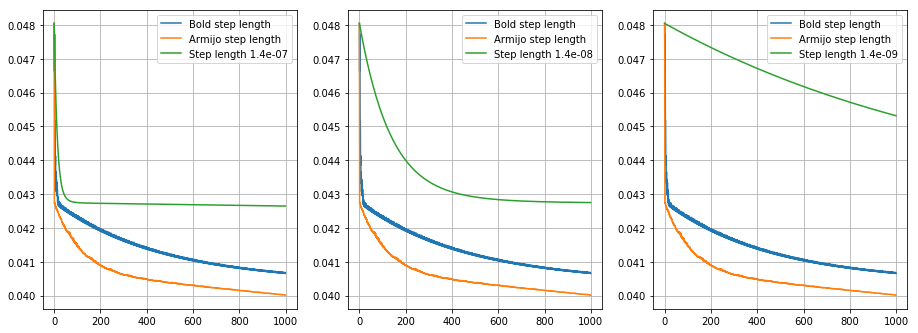

In [372]:
figure, ((ax1, ax2, ax3))  = plt.subplots(1,3,sharey='none')
figure.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph_bold,rmse_graph_bold,iteration_graph_armijo,rmse_graph_armijo,iteration_graph,rmse1)
ax1.legend(['Bold step length','Armijo step length','Step length 1.4e-07'])
ax1.grid()
ax2.plot(iteration_graph_bold,rmse_graph_bold,iteration_graph_armijo,rmse_graph_armijo,iteration_graph,rmse2)
ax2.legend(['Bold step length','Armijo step length','Step length 1.4e-08'])
ax2.grid()
ax3.plot(iteration_graph_bold,rmse_graph_bold,iteration_graph_armijo,rmse_graph_armijo,iteration_graph,rmse3)
ax3.legend(['Bold step length','Armijo step length','Step length 1.4e-09'])
ax3.grid()

# Gradient descent for White wine quality

In [373]:
filename = "winequality-white.csv"
columns = None
redwinedata = read_data(filename,columns)
redwinedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [374]:
redwinedata_correlation = []
for column in redwinedata:
    if column != "quality":
        redwinedata_correlation.append(str(round(pearson_coefficient
                                                 (np.array(redwinedata[column]),np.array(redwinedata["quality"])),4)))

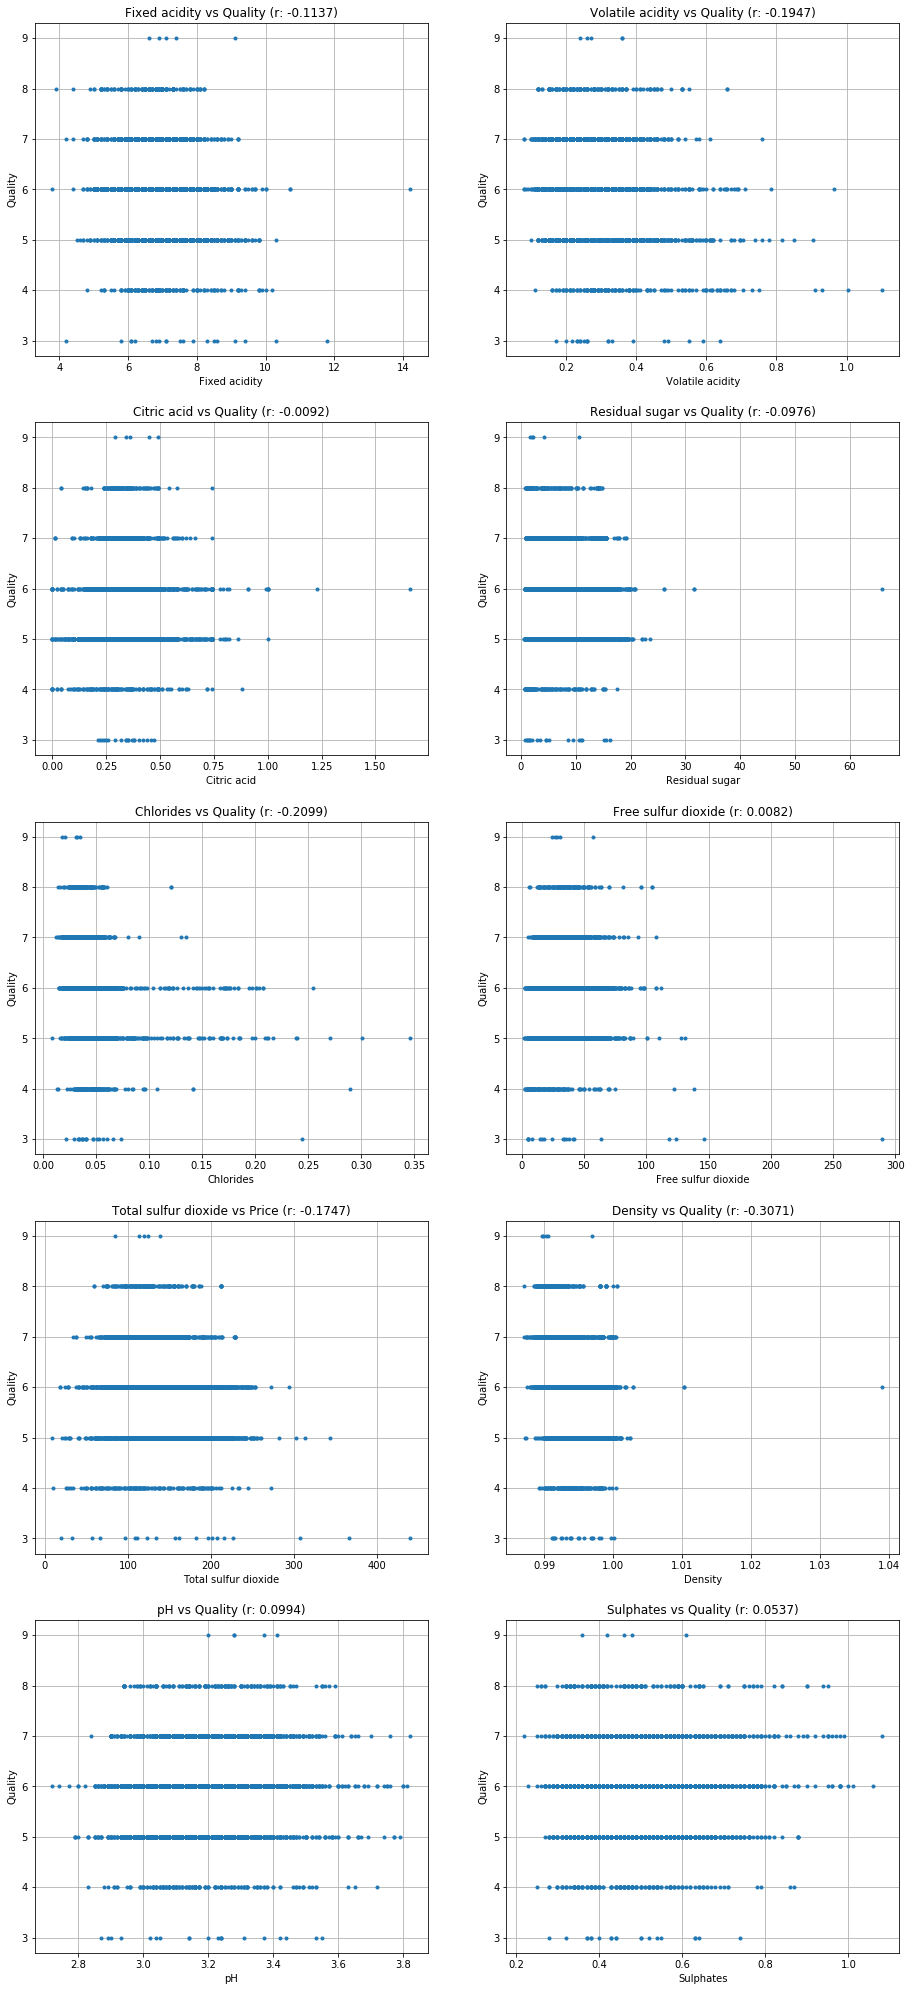

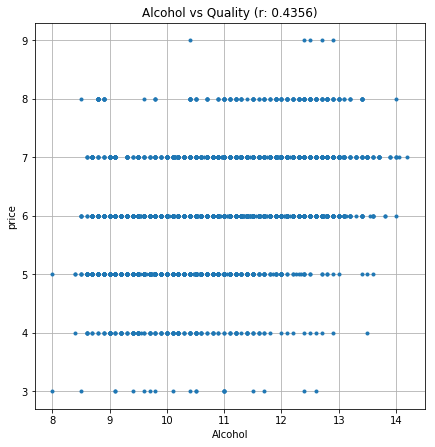

In [375]:
plt.close()
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10))  = plt.subplots(5,2,sharey='none')
figure.set_size_inches(15.5, 35.5)

ax1.plot(redwinedata['fixed acidity'], redwinedata.quality, ".")
ax1.grid()
ax1.set_title("Fixed acidity vs Quality (r: "+redwinedata_correlation[0]+")")
ax1.set_xlabel("Fixed acidity")
ax1.set_ylabel("Quality")

ax2.plot(redwinedata['volatile acidity'], redwinedata.quality, ".")
ax2.grid()
ax2.set_title("Volatile acidity vs Quality (r: "+redwinedata_correlation[1]+")")
ax2.set_xlabel("Volatile acidity")
ax2.set_ylabel("Quality")

ax3.plot(redwinedata['citric acid'], redwinedata.quality, ".")
ax3.grid()
ax3.set_title("Citric acid vs Quality (r: "+redwinedata_correlation[2]+")")
ax3.set_xlabel("Citric acid")
ax3.set_ylabel("Quality")

ax4.plot(redwinedata['residual sugar'], redwinedata.quality, ".")
ax4.grid()
ax4.set_title("Residual sugar vs Quality (r: "+redwinedata_correlation[3]+")")
ax4.set_xlabel("Residual sugar")
ax4.set_ylabel("Quality")

ax5.plot(redwinedata['chlorides'], redwinedata.quality, ".")
ax5.grid()
ax5.set_title("Chlorides vs Quality (r: "+redwinedata_correlation[4]+")")
ax5.set_xlabel("Chlorides")
ax5.set_ylabel("Quality")

ax6.plot(redwinedata['free sulfur dioxide'], redwinedata.quality, ".")
ax6.grid()
ax6.set_title("Free sulfur dioxide (r: "+redwinedata_correlation[5]+")")
ax6.set_xlabel("Free sulfur dioxide")
ax6.set_ylabel("Quality")

ax7.plot(redwinedata['total sulfur dioxide'], redwinedata.quality, ".")
ax7.grid()
ax7.set_title("Total sulfur dioxide vs Price (r: "+redwinedata_correlation[6]+")")
ax7.set_xlabel("Total sulfur dioxide")
ax7.set_ylabel("Quality")

ax8.plot(redwinedata['density'], redwinedata.quality, ".")
ax8.grid()
ax8.set_title("Density vs Quality (r: "+redwinedata_correlation[7]+")")
ax8.set_xlabel("Density")
ax8.set_ylabel("Quality")

ax9.plot(redwinedata['pH'], redwinedata.quality, ".")
ax9.grid()
ax9.set_title("pH vs Quality (r: "+redwinedata_correlation[8]+")")
ax9.set_xlabel("pH")
ax9.set_ylabel("Quality")

ax10.plot(redwinedata['sulphates'], redwinedata.quality, ".")
ax10.grid()
ax10.set_title("Sulphates vs Quality (r: "+redwinedata_correlation[9]+")")
ax10.set_xlabel("Sulphates")
ax10.set_ylabel("Quality")

plt.show()

plt.figure(figsize = (7,7.1))
plt.plot(redwinedata['alcohol'], redwinedata.quality, ".")
plt.grid()
plt.title("Alcohol vs Quality (r: "+redwinedata_correlation[10]+")")
plt.xlabel("Alcohol")
plt.ylabel("price")

plt.show()

From the plots between the parameters and price, we can conclude that there is no relation between City1, City2, Market Leading Airline and Low Price Airline. Hence, I am dropping out these columns from the dataset to be used for creating the model

In [376]:
Required_redwinedata = redwinedata.drop(columns = ['residual sugar','free sulfur dioxide','pH','citric acid','sulphates','total sulfur dioxide'])
                                #,'Avg_Fare1','Avg_Fare2','Mrkt_Share1','Mrkt_Share2'])
Required_redwinedata.head()

,fixed acidity,volatile acidity,chlorides,density,alcohol,quality
0,7.0,0.27,0.045,1.0010,8.8,6
1,6.3,0.30,0.049,0.9940,9.5,6
2,8.1,0.28,0.050,0.9951,10.1,6
3,7.2,0.23,0.058,0.9956,9.9,6
4,7.2,0.23,0.058,0.9956,9.9,6


In [377]:
Shuffle_data = Required_redwinedata.sample(frac = 1)
Y_data = Shuffle_data["quality"]
X_data = Shuffle_data.drop(columns = ['quality'])
X_data = X_data.values
Y_train,Y_test,X_train,X_test = create_Test_Train_data(X_data,Y_data)
print("X_train: ",X_train.shape)
print("Y_train: ",Y_train.shape)
print("X_test:  ",X_test.shape)
print("Y_test:  ",Y_test.shape)

X_train:  (3919, 5)
Y_train:  (3919,)
X_test:   (979, 5)
Y_test:   (979,)


In [378]:
initialbeta = np.random.random_sample(X_data.shape[1]+1)

RMSE (α=1.4e-07)  =  0.028356834611576034
RMSE (α=1.4e-08)  =  0.03521476538879116
RMSE (α=1.54e-09) =  0.039106979539484714


Best Model: 
α = 1.4e-07
β =  [0.0293752  0.30114422 0.94191413 0.26530337 0.37747781 0.29719409]
RMSE 0.028356834611576034 





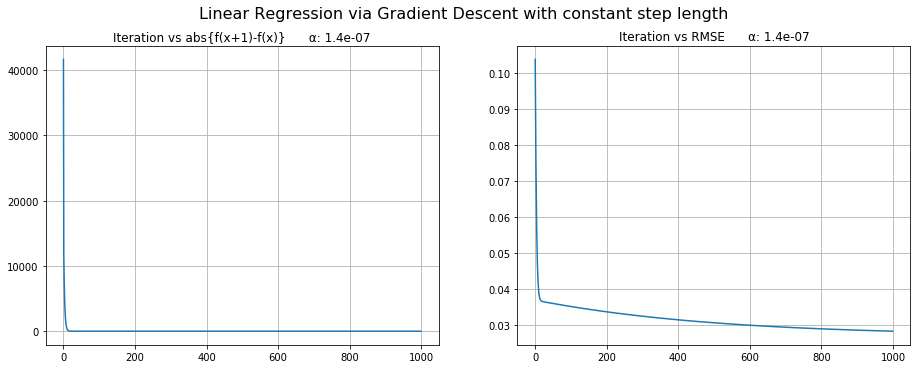

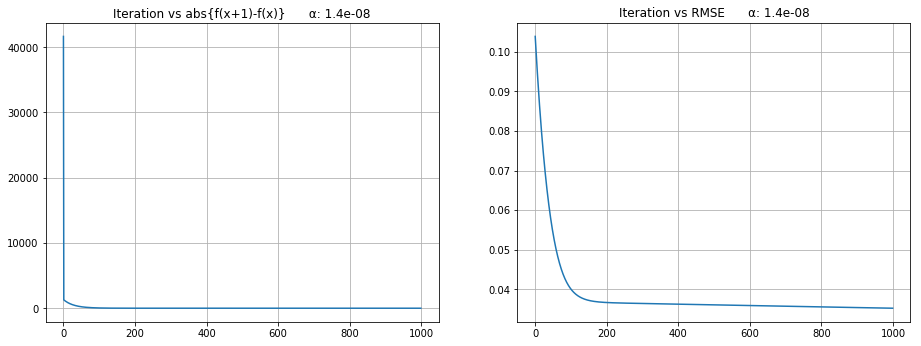

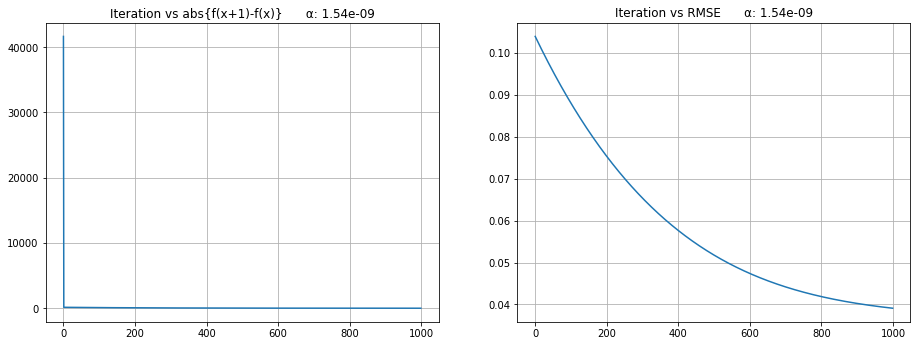

In [379]:
alpha = [1.4e-7,1.4e-8,1.54e-9]
steplength_type = None
plot_rmse = []
plot_iter = []
plot_diff = []
beta1,rmse_graph,iteration_graph,diff_graph,y_pred_constant = linalg_GD(alpha[0],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
figure.set_size_inches(15.5, 5.5)
rmse1 = rmse_graph
plt.suptitle("Linear Regression via Gradient Descent with constant step length\n\n",fontsize = "16")
ax1.plot(iteration_graph,diff_graph)
ax1.grid()
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}      α: "+str(alpha[0]))
ax2.plot(iteration_graph,rmse_graph)
ax2.set_title("Iteration vs RMSE      α: "+str(alpha[0]))
ax2.grid()
plt.show
beta2,rmse_graph,iteration_graph,diff_graph,y_pred_constant1 = linalg_GD(alpha[1],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure1, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
figure1.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph,diff_graph)
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}      α: "+str(alpha[1]))
ax1.grid()
ax2.plot(iteration_graph,rmse_graph)
ax2.set_title("Iteration vs RMSE      α: "+str(alpha[1]))
ax2.grid()
plt.show
rmse2 = rmse_graph
beta3,rmse_graph,iteration_graph,diff_graph,y_pred_constant2 = linalg_GD(alpha[2],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure1, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
figure1.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph,diff_graph)
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}      α: "+str(alpha[2]))
ax1.grid()
ax2.plot(iteration_graph,rmse_graph)
ax2.set_title("Iteration vs RMSE      α: "+str(alpha[2]))
ax2.grid()
plt.show
rmse3 = rmse_graph

print("RMSE (α=1.4e-07)  = ",rmse1[-1])
print("RMSE (α=1.4e-08)  = ",rmse2[-1])
print("RMSE (α=1.54e-09) = ",rmse3[-1])


print("\n\nBest Model: \nα = 1.4e-07\nβ = ",beta1)
print("RMSE",rmse1[-1],"\n\n\n")

In [380]:
combined = pd.DataFrame({"Actual Price":Y_test,"Prediction (α=1.54e-09)":y_pred_constant2,"Prediction (α=1.4e-07)":y_pred_constant,"Prediction (α=1.4e-08)":y_pred_constant1})
combined.head(15)

,Actual Price,Prediction (α=1.4e-07),Prediction (α=1.4e-08),Prediction (α=1.54e-09)
3831,5,5.619864,5.826483,6.272129
1675,5,5.184288,5.337733,5.743079
1992,5,5.494455,5.767215,6.227973
1077,5,5.980319,6.450464,6.970837
3381,7,5.853098,5.835871,6.277427
3722,5,5.946132,6.428533,6.943293
1549,6,6.174623,6.822508,7.394711
2367,6,5.574083,6.040038,6.522534
2735,6,5.648278,5.678628,6.097529
1891,5,5.722370,6.332454,6.846719


<function matplotlib.pyplot.show(*args, **kw)>

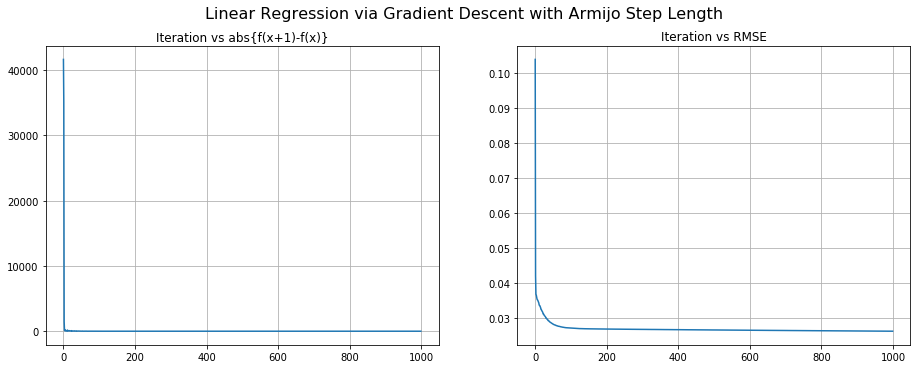

In [381]:
alpha = [1]
steplength_type = "Armijo"
plot_rmse_armijo = []
plot_iter_armijo = []
plot_diff_armijo = []
beta,rmse_graph_armijo,iteration_graph_armijo,diff_graph_armijo,Y_prediction = linalg_GD(alpha[0],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
figure.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph_armijo,diff_graph_armijo)
ax1.grid()
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}")
ax2.plot(iteration_graph_armijo,rmse_graph_armijo)
ax2.set_title("Iteration vs RMSE")
ax2.grid()
plt.suptitle("Linear Regression via Gradient Descent with Armijo Step Length\n",fontsize = "16")
plt.show

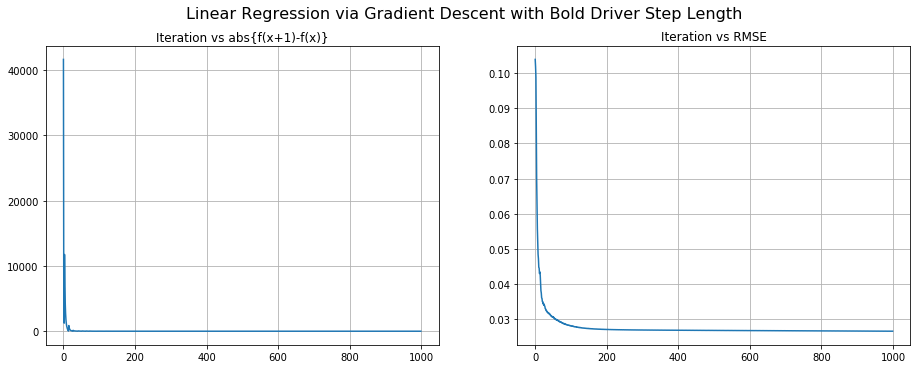

In [382]:
alpha = [1]
steplength_type = "Bold"
plot_rmse_bold = []
plot_iter_bold = []
plot_diff_bold = []
beta,rmse_graph_bold,iteration_graph_bold,diff_graph_bold,Y_prediction_bold = linalg_GD(alpha[0],initialbeta,Y_train,Y_test,X_train,X_test,steplength_type)
figure, ((ax1, ax2))  = plt.subplots(1,2,sharey='none')
plt.suptitle("Linear Regression via Gradient Descent with Bold Driver Step Length",fontsize = "16")
figure.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph_bold,diff_graph_bold)
ax1.grid()
ax1.set_title("Iteration vs abs{f(x+1)-f(x)}")
ax2.plot(iteration_graph_bold,rmse_graph_bold)
ax2.set_title("Iteration vs RMSE")
ax2.grid()

In [383]:
combined = pd.DataFrame({"Actual Price":Y_test,"Constant steplength":y_pred_constant1,"Armijo steplength":Y_prediction,"Bold steplength":Y_prediction_bold})

print("RMSE with Armijo step length: ",rmse_graph_armijo[-1])
print("RMSE with Bold driver step length: ",rmse_graph_bold[-1])
print("RMSE with constant step length: ",rmse1[-1],"\n\n\n")

combined.head(15)


RMSE with Armijo step length:  0.026318416107221996
RMSE with Bold driver step length:  0.026643584770946926
RMSE with constant step length:  0.028356834611576034 





,Actual Price,Armijo steplength,Bold steplength,Constant steplength
3831,5,5.515023,5.504760,5.826483
1675,5,5.163029,5.127362,5.337733
1992,5,5.448351,5.393632,5.767215
1077,5,5.721040,5.716821,6.450464
3381,7,5.904876,5.876030,5.835871
3722,5,5.661366,5.666303,6.428533
1549,6,5.849357,5.831158,6.822508
2367,6,5.334347,5.322833,6.040038
2735,6,5.620668,5.618102,5.678628
1891,5,5.377830,5.379453,6.332454


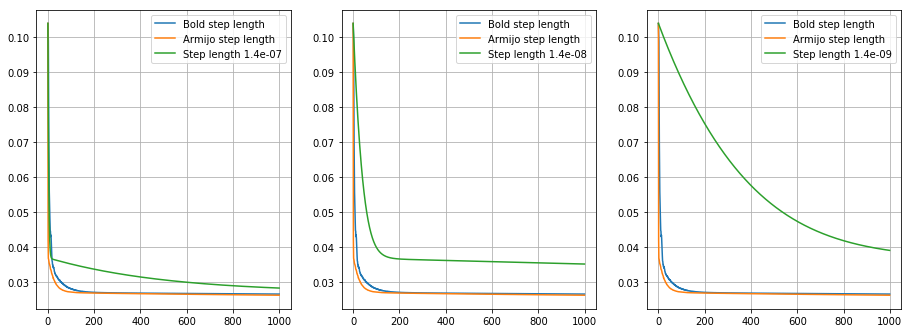

In [384]:
figure, ((ax1, ax2, ax3))  = plt.subplots(1,3,sharey='none')
figure.set_size_inches(15.5, 5.5)
ax1.plot(iteration_graph_bold,rmse_graph_bold,iteration_graph_armijo,rmse_graph_armijo,iteration_graph,rmse1)
ax1.legend(['Bold step length','Armijo step length','Step length 1.4e-07'])
ax1.grid()
ax2.plot(iteration_graph_bold,rmse_graph_bold,iteration_graph_armijo,rmse_graph_armijo,iteration_graph,rmse2)
ax2.legend(['Bold step length','Armijo step length','Step length 1.4e-08'])
ax2.grid()
ax3.plot(iteration_graph_bold,rmse_graph_bold,iteration_graph_armijo,rmse_graph_armijo,iteration_graph,rmse3)
ax3.legend(['Bold step length','Armijo step length','Step length 1.4e-09'])
ax3.grid()